[View in Colaboratory](https://colab.research.google.com/github/venkatakula9652/Complaints_Framework/blob/master/Complaints_Framework_Model_merged_dataset.ipynb)

In [0]:
# IMPORTING NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
data = pd.read_csv("drive/Complaints_Dataset/complaints-2018-08-17.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Unnamed: 23,Zip Code,Place Name,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,05-11-2018,Mortgage,FHA mortgage,Trouble during payment process,NaN,NaN,Company believes complaint is the result of an...,"loanDepot.com, LLC",AA,34031,...,NaN,501.0,Holtsville,NaN,NaN,NaN,92274.0,100 Palms,California,CA
1,02/20/13,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,AA,98282,...,NaN,544.0,Holtsville,NaN,NaN,NaN,92276.0,1000 Palms,California,CA
2,09/17/16,Mortgage,VA mortgage,"Loan modification,collection,foreclosure",NaN,I ran into some financial issues and contacted...,NaN,FIFTH THIRD FINANCIAL CORPORATION,AA,340XX,...,NaN,1001.0,Agawam,NaN,NaN,NaN,92277.0,29 Palms,California,CA
3,08/18/15,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,"My mortgage servicer, PHH corporation, has fai...",NaN,PHH Mortgage Services Corporation,AA,340XX,...,NaN,1002.0,Amherst,NaN,NaN,NaN,92278.0,29 Palms,California,CA
4,05/28/14,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",AA,34058,...,NaN,1003.0,Amherst,NaN,NaN,NaN,90848.0,A A R P,California,CA


In [0]:
data = data[data.Company == 'WELLS FARGO & COMPANY']

In [0]:
data = data[data.State.isin(['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY'])]

In [0]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Unnamed: 23,Zip Code,Place Name,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
114,11/14/16,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AK,99524,...,NaN,1245.0,Monterey,NaN,NaN,NaN,92307.0,Apple Valley,California,CA
117,02-09-2015,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99567,...,NaN,1253.0,Otis,NaN,NaN,NaN,95001.0,Aptos,California,CA
118,03-02-2016,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,I refinanced my loan with Wells Fargo. The ori...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AK,995XX,...,NaN,1254.0,Richmond,NaN,NaN,NaN,95003.0,Aptos,California,CA
120,12-02-2014,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99507,...,NaN,1256.0,Savoy,NaN,NaN,NaN,95912.0,Arbuckle,California,CA
123,03-07-2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99516,...,NaN,1259.0,Southfield,NaN,NaN,NaN,91066.0,Arcadia,California,CA


In [0]:
data.index = range(data.shape[0])
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Unnamed: 23,Zip Code,Place Name,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,11/14/16,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AK,99524,...,NaN,1245.0,Monterey,NaN,NaN,NaN,92307.0,Apple Valley,California,CA
1,02-09-2015,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99567,...,NaN,1253.0,Otis,NaN,NaN,NaN,95001.0,Aptos,California,CA
2,03-02-2016,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,I refinanced my loan with Wells Fargo. The ori...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,AK,995XX,...,NaN,1254.0,Richmond,NaN,NaN,NaN,95003.0,Aptos,California,CA
3,12-02-2014,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99507,...,NaN,1256.0,Savoy,NaN,NaN,NaN,95912.0,Arbuckle,California,CA
4,03-07-2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,WELLS FARGO & COMPANY,AK,99516,...,NaN,1259.0,Southfield,NaN,NaN,NaN,91066.0,Arcadia,California,CA


In [0]:
data.shape

(34081, 33)

In [0]:
#req_cols = ['Date received','Issue','State','Submitted via', 'Date sent to company','Company reponse to consumer']
req_cols = ['Date received','Issue','City','State','Submitted via', 'Date sent to company','Company response to consumer']

In [0]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'City',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Zip Code', 'Place Name', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32'],
      dtype='object')

In [0]:
data_req = data[req_cols]

In [0]:
data_req.shape

(34081, 7)

In [0]:
data_req.columns

Index(['Date received', 'Issue', 'City', 'State', 'Submitted via',
       'Date sent to company', 'Company response to consumer'],
      dtype='object')

In [0]:
data_req['Date received']=pd.to_datetime(data_req['Date received'])
data_req['Date sent to company']=pd.to_datetime(data_req['Date sent to company'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34081 entries, 0 to 34080
Data columns (total 7 columns):
Date received                   34081 non-null datetime64[ns]
Issue                           34081 non-null object
City                            28423 non-null object
State                           34081 non-null object
Submitted via                   34081 non-null object
Date sent to company            34081 non-null datetime64[ns]
Company response to consumer    34081 non-null object
dtypes: datetime64[ns](2), object(5)
memory usage: 1.8+ MB


In [0]:
data_req['Time Difference'] = (data_req['Date sent to company']-data_req['Date received']).astype('timedelta64[s]')
data_req.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date received,Issue,City,State,Submitted via,Date sent to company,Company response to consumer,Time Difference
0,2016-11-14,"Loan modification,collection,foreclosure",Anchorage,AK,Referral,2016-11-16,Closed with explanation,172800.0
1,2015-02-09,"Loan modification,collection,foreclosure",Chugiak,AK,Web,2015-02-09,Closed with explanation,0.0
2,2016-03-02,"Application, originator, mortgage broker",NaN,AK,Web,2016-03-04,Closed with monetary relief,172800.0
3,2014-12-02,"Loan modification,collection,foreclosure",Anchorage,AK,Web,2014-12-05,Closed with explanation,259200.0
4,2013-03-07,"Loan servicing, payments, escrow account",Anchorage,AK,Referral,2013-03-08,Closed with explanation,86400.0


In [0]:
data_req.loc[data_req['Time Difference'] < 0, 'Time Difference'] = 0
data_req.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date received,Issue,City,State,Submitted via,Date sent to company,Company response to consumer,Time Difference
0,2016-11-14,"Loan modification,collection,foreclosure",Anchorage,AK,Referral,2016-11-16,Closed with explanation,172800.0
1,2015-02-09,"Loan modification,collection,foreclosure",Chugiak,AK,Web,2015-02-09,Closed with explanation,0.0
2,2016-03-02,"Application, originator, mortgage broker",NaN,AK,Web,2016-03-04,Closed with monetary relief,172800.0
3,2014-12-02,"Loan modification,collection,foreclosure",Anchorage,AK,Web,2014-12-05,Closed with explanation,259200.0
4,2013-03-07,"Loan servicing, payments, escrow account",Anchorage,AK,Referral,2013-03-08,Closed with explanation,86400.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
values=data_req['Time Difference'].values.reshape((len(data_req['Time Difference']), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
# normalize the dataset
data_req['Time Difference'] = scaler.transform(values)  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
data_req.head()

,Date received,Issue,City,State,Submitted via,Date sent to company,Company response to consumer,Time Difference
0,2016-11-14,"Loan modification,collection,foreclosure",Anchorage,AK,Referral,2016-11-16,Closed with explanation,0.003846
1,2015-02-09,"Loan modification,collection,foreclosure",Chugiak,AK,Web,2015-02-09,Closed with explanation,0.000000
2,2016-03-02,"Application, originator, mortgage broker",NaN,AK,Web,2016-03-04,Closed with monetary relief,0.003846
3,2014-12-02,"Loan modification,collection,foreclosure",Anchorage,AK,Web,2014-12-05,Closed with explanation,0.005769
4,2013-03-07,"Loan servicing, payments, escrow account",Anchorage,AK,Referral,2013-03-08,Closed with explanation,0.001923


In [0]:
data_req.dtypes

Date received                   datetime64[ns]
Issue                                   object
City                                    object
State                                   object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Time Difference                        float64
dtype: object

In [0]:
data_req=data_req.drop(data_req.columns[[0, 4]], axis=1)

In [0]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34081 entries, 0 to 34080
Data columns (total 6 columns):
Issue                           34081 non-null object
City                            28423 non-null object
State                           34081 non-null object
Date sent to company            34081 non-null datetime64[ns]
Company response to consumer    34081 non-null object
Time Difference                 34081 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.6+ MB


In [0]:
data_req['Issue'].value_counts(dropna=False)

Loan modification,collection,foreclosure                                            17187
Loan servicing, payments, escrow account                                             7955
Application, originator, mortgage broker                                             2554
Struggling to pay mortgage                                                           1651
Trouble during payment process                                                       1406
Settlement process and costs                                                         1081
Credit decision / Underwriting                                                        858
Other                                                                                 708
Applying for a mortgage or refinancing an existing mortgage                           301
Closing on a mortgage                                                                 225
Incorrect information on your report                                                   75
Applying f

In [0]:
data_req['City'].value_counts(dropna=False)

NaN                 5658
Miami                513
Los Angeles          296
Atlanta              266
Brooklyn             231
Chicago              227
San Diego            194
Philadelphia         190
Jacksonville         157
Fort Lauderdale      157
Washington           156
Las Vegas            154
Pompano Beach        143
San Francisco        143
Charlotte            137
New York             137
Orlando              129
San Jose             128
Seattle              123
Minneapolis          122
Sacramento           122
Houston              119
Phoenix              112
Portland             111
West Palm Beach      105
Hollywood            104
Dallas               101
Oakland               99
Baltimore             98
Corona                96
                    ... 
Hamptonville           1
Port Sanilac           1
Providence Forge       1
Zephyr Cove            1
Wixom                  1
Orland                 1
Roaring Springs        1
Dwight                 1
South Charleston       1


In [0]:
data_req['Submitted via'].value_counts(dropna=False)

KeyError: ignored

In [0]:
data_req['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            29158
Closed without relief               1960
Closed with non-monetary relief     1622
Closed with monetary relief         1055
In progress                          161
Closed                                64
Closed with relief                    57
Untimely response                      4
Name: Company response to consumer, dtype: int64

In [0]:
data_req['Time Difference'].value_counts(dropna=False)

0.000000    13869
0.001923     6012
0.003846     3376
0.005769     2542
0.007692     2347
0.009615     2009
0.011538     1293
0.013462      832
0.015385      286
0.017308      142
0.019231      142
0.028846       95
0.025000       91
0.021154       85
0.023077       85
0.026923       68
0.032692       63
0.030769       43
0.036538       38
0.067308       36
0.042308       34
0.038462       32
0.040385       32
0.034615       30
0.055769       24
0.053846       24
0.044231       23
0.075000       22
0.046154       22
0.069231       22
            ...  
0.157692        1
0.190385        1
0.405769        1
0.144231        1
0.317308        1
0.334615        1
0.263462        1
0.425000        1
0.186538        1
0.496154        1
0.494231        1
0.446154        1
0.113462        1
0.390385        1
0.523077        1
0.250000        1
0.203846        1
0.513462        1
0.480769        1
0.169231        1
0.121154        1
0.342308        1
0.253846        1
0.225000        1
0.209615  

In [0]:
data_req=data_req.dropna(how='any')  

In [0]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28423 entries, 0 to 34078
Data columns (total 6 columns):
Issue                           28423 non-null object
City                            28423 non-null object
State                           28423 non-null object
Date sent to company            28423 non-null datetime64[ns]
Company response to consumer    28423 non-null object
Time Difference                 28423 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ MB


In [0]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28423 entries, 0 to 34078
Data columns (total 6 columns):
Issue                           28423 non-null object
City                            28423 non-null object
State                           28423 non-null object
Date sent to company            28423 non-null datetime64[ns]
Company response to consumer    28423 non-null object
Time Difference                 28423 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ MB


In [0]:
!pip install kmodes

In [0]:
from kmodes.kprototypes import KPrototypes


In [0]:
km = KPrototypes(n_clusters=10, init='Huang', n_init=8, verbose=1)

In [0]:
#clusters = km.fit_predict(data_req_new)
clusters = km.fit_predict(data_req.as_matrix(), categorical=list(range(0,5)))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10581, ncost: 999.0083950280405
Run: 1, iteration: 2/100, moves: 1506, ncost: 996.7924793180496
Run: 1, iteration: 3/100, moves: 256, ncost: 996.6811999733095
Run: 1, iteration: 4/100, moves: 2, ncost: 996.6789043424358
Run: 1, iteration: 5/100, moves: 0, ncost: 996.6789043424358
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 5881, ncost: 1011.0179674921546
Run: 2, iteration: 2/100, moves: 337, ncost: 1010.8653069223124
Run: 2, iteration: 3/100, moves: 21, ncost: 1010.8605429532532
Run: 2, iteration: 4/100, moves: 8, ncost: 1010.8605132282626
Run: 2, iteration: 5/100, moves: 0, ncost: 1010.8605132282626
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 5525, ncost: 1001.4743910377556
Run: 3, iteration: 2/100, moves: 2356, ncost: 1001.2912786157568


In [0]:
print(km.cluster_centroids_)

[array([[0.00338867],
       [0.0022081 ],
       [0.05088183],
       [0.00731828],
       [0.00476064],
       [0.00605499],
       [0.00925446],
       [0.01146162],
       [0.00463616],
       [0.00653722]]), array([['Application, originator, mortgage broker', 'Riverside', 'CA',
        Timestamp('2018-03-26 00:00:00'), 'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Miami', 'FL',
        Timestamp('2013-01-17 00:00:00'), 'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Philadelphia', 'PA',
        Timestamp('2018-05-24 00:00:00'), 'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Brooklyn', 'NY',
        Timestamp('2012-06-22 00:00:00'), 'Closed with explanation'],
       ['Loan servicing, payments, escrow account', 'Los Angeles', 'CA',
        Timestamp('2014-03-04 00:00:00'), 'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Chicago', 'CA',
        Times

In [0]:
clusters=clusters.reshape(28423,1)

In [0]:
class_cluster = pd.DataFrame(clusters,columns=['Class cluster'])

In [0]:
class_cluster.head()

,Class cluster
0,1
1,1
2,9
3,4
4,3


In [0]:
data_req.head()


,Issue,City,State,Date sent to company,Company response to consumer,Time Difference
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000
3,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769
4,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923
5,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692


In [0]:
data_req.index = range(data_req.shape[0])
data_req.head()

,Issue,City,State,Date sent to company,Company response to consumer,Time Difference
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000
2,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769
3,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923
4,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692


In [0]:
data_req = pd.concat([data_req,class_cluster],axis=1)

In [0]:
data_req.head()

,Issue,City,State,Date sent to company,Company response to consumer,Time Difference,Class cluster
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846,1
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000,1
2,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769,9
3,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923,4
4,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692,3


In [0]:
# DF TO CSV
path= r'drive/Complaints_Dataset/'
data_req.to_csv(path+'clusteredComplaintsDataSet.csv', sep=',', encoding='utf-8')


In [0]:
from __future__ import division, print_function

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:

import  matplotlib  
matplotlib.rc('figure', figsize = (14, 7))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

In [0]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

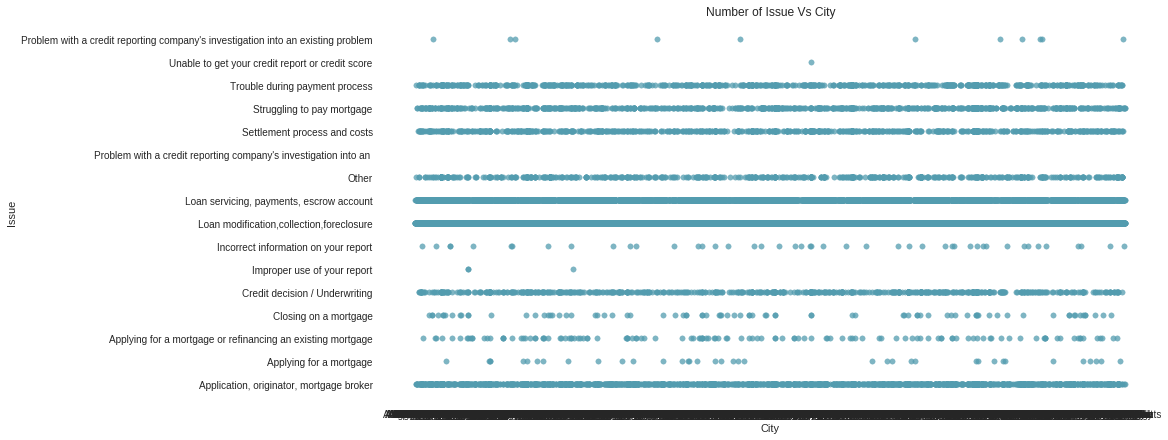

In [0]:
scatterplot(x_data = data_req['City']
            , y_data = data_req['Issue']
            , x_label = 'City'
            , y_label = 'Issue'
            , title = 'Number of Issue Vs City')

In [0]:
import random
data_req['frequency']=(data_req.groupby('City')['City'].transform('count'))
data_req['customers_needed']=(data_req.groupby('City')['City'].transform('count')//20)+1
data_req['Customer_id']=""
data_req.head()

,Issue,City,State,Date sent to company,Company response to consumer,Time Difference,Class cluster,frequency,customers_needed,Customer_id
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846,1,30,2,
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000,1,3,1,
2,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769,9,30,2,
3,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923,4,30,2,
4,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692,3,30,2,


In [0]:
data_req['customers_needed'].value_counts(dropna=False)

1     15038
2      4901
3      1904
5      1139
4      1064
8       910
7       898
6       652
26      513
12      458
10      384
15      296
14      266
Name: customers_needed, dtype: int64

In [0]:
import random
for i in data_req.index:
  data_req.at[i, 'Customer_id']="Customer_"+data_req.at[i, 'City'][0:3]+"_"+str(data_req.at[i, 'frequency'])+"_"+str(random.randint(1, data_req.at[i, 'customers_needed']))
  
data_req.head()


,Issue,City,State,Date sent to company,Company response to consumer,Time Difference,Class cluster,frequency,customers_needed,Customer_id
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846,1,30,2,Customer_Anc_30_1
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000,1,3,1,Customer_Chu_3_1
2,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769,9,30,2,Customer_Anc_30_1
3,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923,4,30,2,Customer_Anc_30_2
4,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692,3,30,2,Customer_Anc_30_2


In [0]:
data_req=data_req.drop(columns=['frequency', 'customers_needed'])
data_req.head()

,Issue,City,State,Date sent to company,Company response to consumer,Time Difference,Class cluster,Customer_id
0,"Loan modification,collection,foreclosure",Anchorage,AK,2016-11-16,Closed with explanation,0.003846,1,Customer_Anc_30_1
1,"Loan modification,collection,foreclosure",Chugiak,AK,2015-02-09,Closed with explanation,0.000000,1,Customer_Chu_3_1
2,"Loan modification,collection,foreclosure",Anchorage,AK,2014-12-05,Closed with explanation,0.005769,9,Customer_Anc_30_1
3,"Loan servicing, payments, escrow account",Anchorage,AK,2013-03-08,Closed with explanation,0.001923,4,Customer_Anc_30_2
4,"Loan modification,collection,foreclosure",Anchorage,AK,2013-05-28,Closed with explanation,0.007692,3,Customer_Anc_30_2


In [0]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28423 entries, 0 to 28422
Data columns (total 8 columns):
Issue                           28423 non-null object
City                            28423 non-null object
State                           28423 non-null object
Date sent to company            28423 non-null datetime64[ns]
Company response to consumer    28423 non-null object
Time Difference                 28423 non-null float64
Class cluster                   28423 non-null uint8
Customer_id                     28423 non-null object
dtypes: datetime64[ns](1), float64(1), object(5), uint8(1)
memory usage: 1.5+ MB


In [0]:
data_req['Customer_id'].value_counts(dropna=False)

Customer_San_17_1      51
Customer_New_7_1       49
Customer_Red_15_1      45
Customer_Mon_13_1      39
Customer_El _19_1      38
Customer_Wes_12_1      36
Customer_Lak_34_2      34
Customer_Lak_34_1      34
Customer_Wes_11_1      33
Customer_Sea_123_3     31
Customer_Mia_513_25    30
Customer_Gra_10_1      30
Customer_Wes_3_1       30
Customer_New_10_1      30
Customer_Eas_15_1      30
Customer_Chi_227_11    30
Customer_Los_296_12    30
Customer_San_15_1      30
Customer_New_15_1      30
Customer_Atl_266_10    29
Customer_New_23_2      29
Customer_Las_154_7     29
Customer_Mia_513_16    28
Customer_For_157_4     28
Customer_Pal_14_1      28
Customer_Nor_4_1       28
Customer_New_4_1       28
Customer_Man_14_1      28
Customer_Roc_7_1       28
Customer_Bro_231_3     27
                       ..
Customer_Zep_1_1        1
Customer_Apa_1_1        1
Customer_Ock_1_1        1
Customer_Hat_1_1        1
Customer_Mcp_1_1        1
Customer_Swi_1_1        1
Customer_Wic_1_1        1
Customer_Ayl

In [0]:
# DF TO CSV
path= r'drive/Complaints_Dataset/'
data_req.to_csv(path+'ComplaintsDataSetWithCustomers.csv', sep=',', encoding='utf-8')